In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl
from Synthetic import *

### Load Erdos-Renyi

In [2]:
ER_single('Caltech36')

### Load Watts-Strogatz

In [3]:
WS_single('Caltech36')

### Load Barabasi-Albert (preferential attachment)

In [4]:
BA_single('Caltech36')

### Load Confinguration Model

In [5]:
CM_single('Caltech36')

# Synthetic Baseline

Getting save path...
Loading precomputed dictionary from dictionaries/CM_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k50_xi7_nc25_iter250_bi0.pkl
Loading dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\CM_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k50_nc25_iter250_bi0_single.png


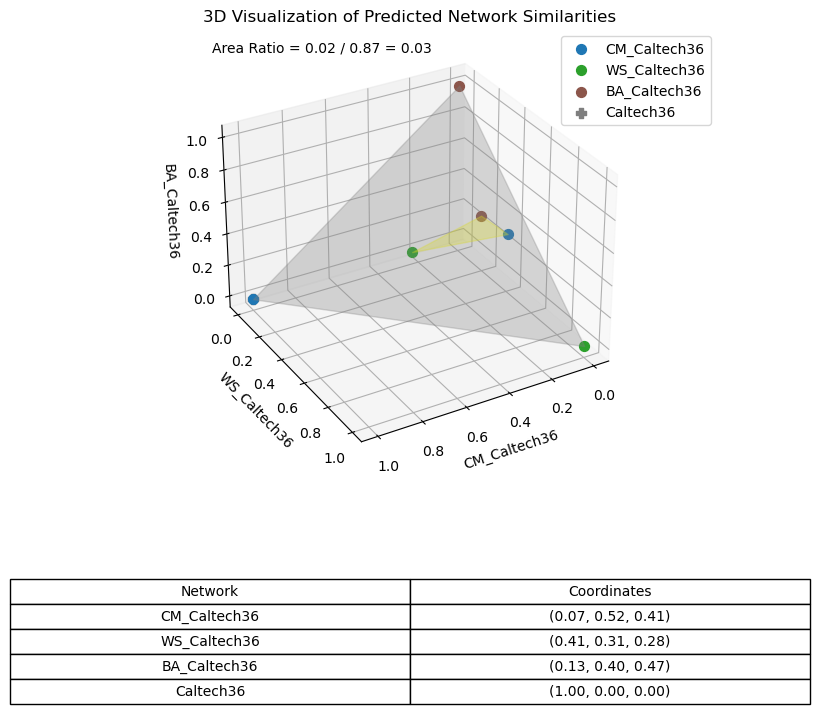

In [12]:
ntwk_list = ['CM_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=50, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k50_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_Caltech36
Calling `sndl_equalEdge` and computing dictionary for WS_Caltech36
Calling `sndl_equalEdge` and computing dictionary for BA_Caltech36


100%|██████████| 250/250 [00:37<00:00,  6.71it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\ER_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k50_nc25_iter250_bi0_single.png


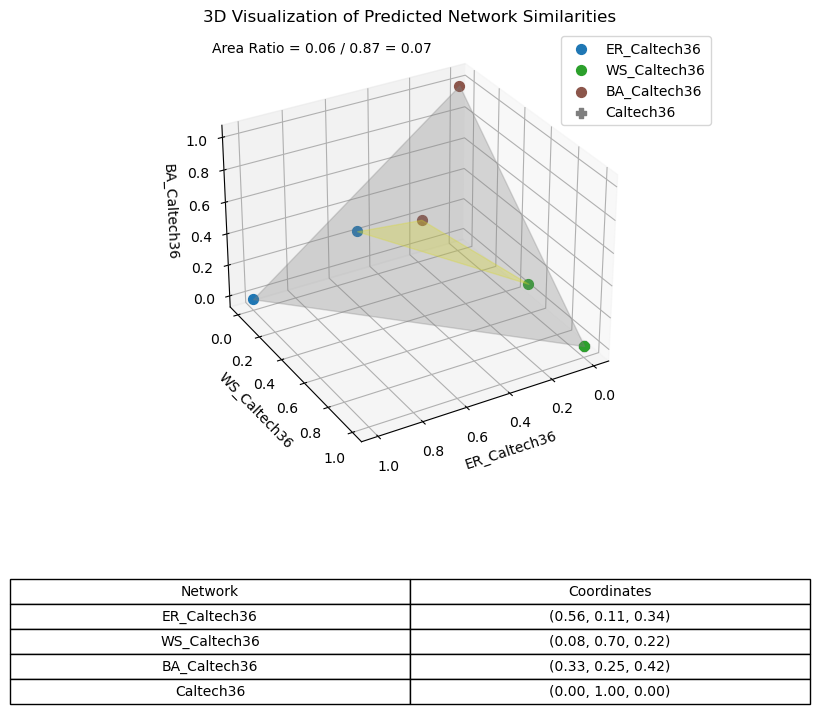

In [21]:
ntwk_list = ['ER_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=50, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k50_xi8_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_Caltech36
Calling `sndl_equalEdge` and computing dictionary for WS_Caltech36
Calling `sndl_equalEdge` and computing dictionary for BA_Caltech36


100%|██████████| 250/250 [00:38<00:00,  6.47it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\ER_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k50_nc25_iter250_bi0_single.png


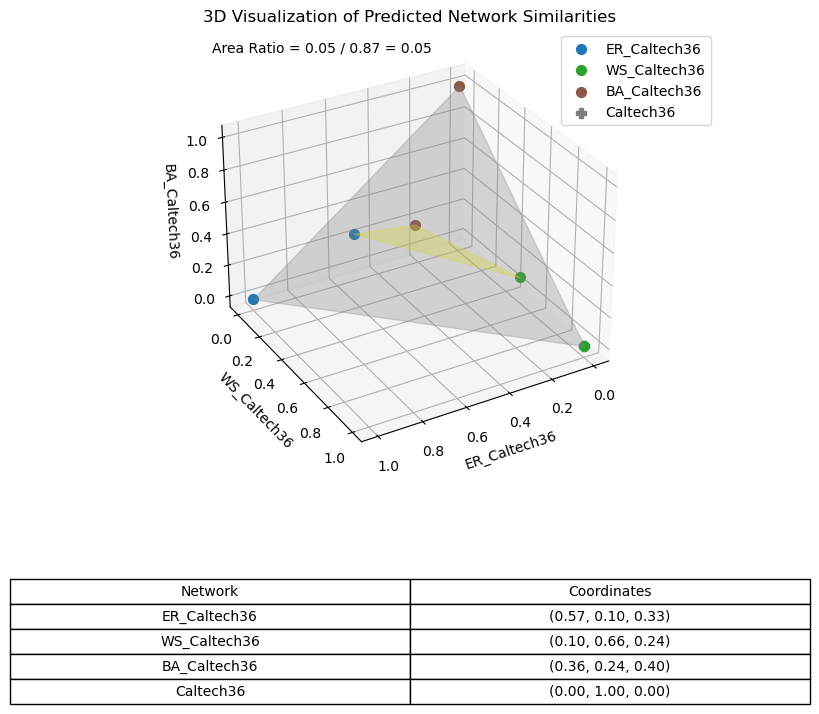

In [20]:
ntwk_list = ['ER_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=50, n_components=25, iterations=250, 
                   xi=3, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_Caltech36_WS_Caltech36_BA_Caltech36_bs500_k70_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_Caltech36
Calling `sndl_equalEdge` and computing dictionary for WS_Caltech36
Calling `sndl_equalEdge` and computing dictionary for BA_Caltech36


100%|██████████| 250/250 [00:51<00:00,  4.84it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\ER_Caltech36_WS_Caltech36_BA_Caltech36_etc_bs500_k70_nc25_iter250_bi0_single.png


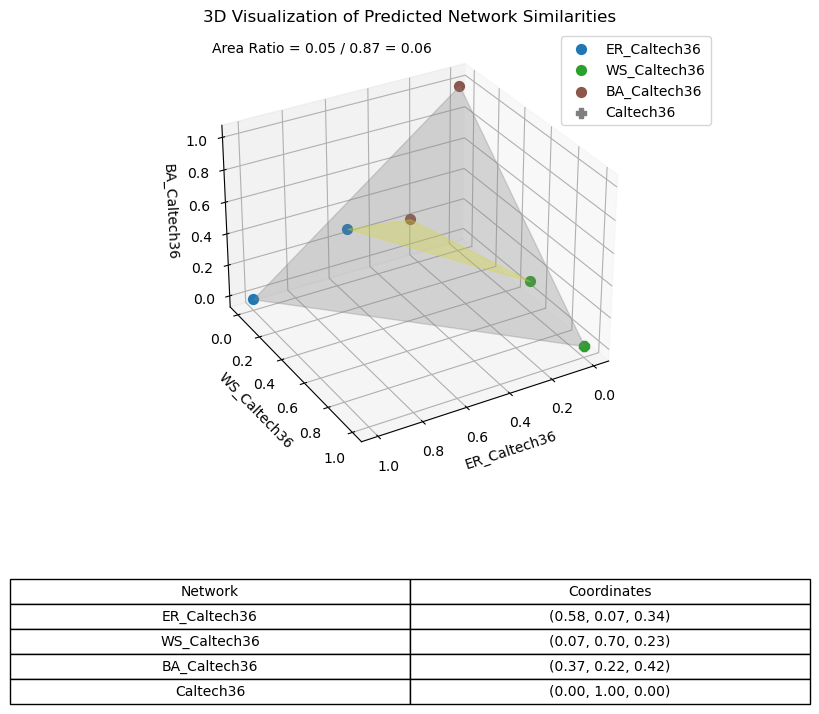

In [3]:
ntwk_list = ['ER_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=70, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Computing latent motifs for networks (0, 1)


100%|██████████| 250/250 [00:16<00:00, 15.16it/s]


Computing latent motifs for networks (0, 2)


100%|██████████| 250/250 [00:23<00:00, 10.83it/s]


Computing latent motifs for networks (0, 3)


100%|██████████| 250/250 [00:16<00:00, 15.28it/s]


Computing latent motifs for networks (0, 4)


100%|██████████| 250/250 [00:14<00:00, 17.77it/s]


Computing latent motifs for networks (1, 2)


100%|██████████| 250/250 [00:16<00:00, 15.47it/s]


Computing latent motifs for networks (1, 3)


100%|██████████| 250/250 [00:16<00:00, 15.38it/s]


Computing latent motifs for networks (1, 4)


100%|██████████| 250/250 [00:13<00:00, 18.37it/s]


Computing latent motifs for networks (2, 3)


100%|██████████| 250/250 [00:16<00:00, 15.50it/s]


Computing latent motifs for networks (2, 4)


100%|██████████| 250/250 [00:13<00:00, 17.97it/s]


Computing latent motifs for networks (3, 4)


100%|██████████| 250/250 [00:13<00:00, 18.26it/s]


Computing affinity score for pair (0, 1) with test network 0
Computing affinity score for pair (0, 1) with test network 1
Computing affinity score for pair (0, 1) with test network 2
Computing affinity score for pair (0, 1) with test network 3
Computing affinity score for pair (0, 1) with test network 4
Computing affinity score for pair (0, 2) with test network 0
Computing affinity score for pair (0, 2) with test network 1
Computing affinity score for pair (0, 2) with test network 2
Computing affinity score for pair (0, 2) with test network 3
Computing affinity score for pair (0, 2) with test network 4
Computing affinity score for pair (0, 3) with test network 0
Computing affinity score for pair (0, 3) with test network 1
Computing affinity score for pair (0, 3) with test network 2
Computing affinity score for pair (0, 3) with test network 3
Computing affinity score for pair (0, 3) with test network 4
Computing affinity score for pair (0, 4) with test network 0
Computing affinity score

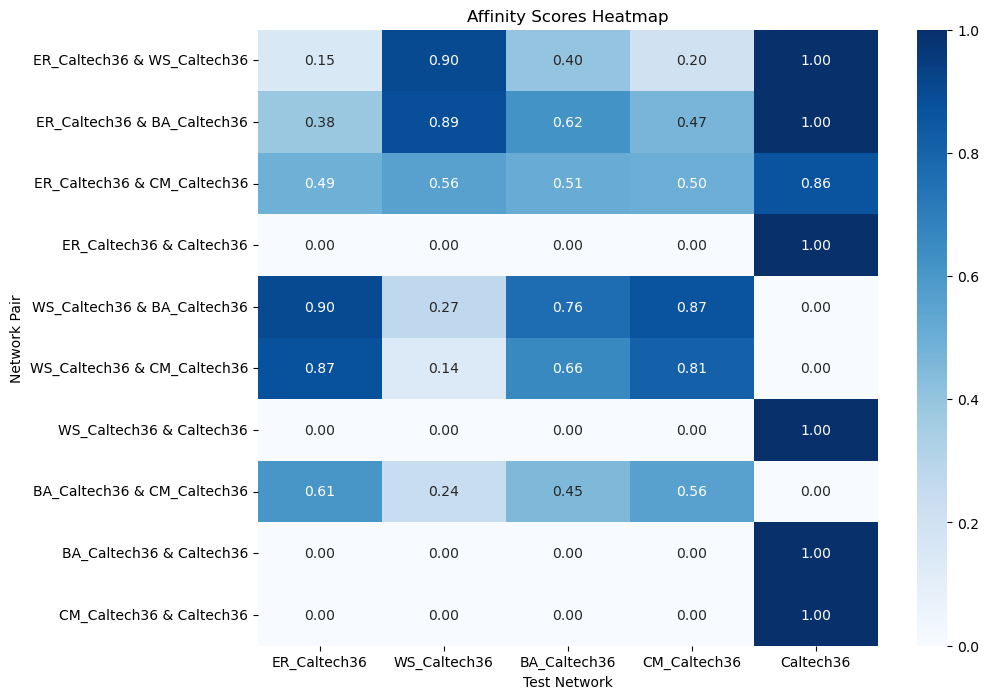

In [4]:
# Biological Experiment
ntwk_list = ['ER_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'CM_Caltech36', 'Caltech36']
sample_size_list = [300, 300]
k = 60
xi = 7
n_components = 16
iterations = 250
skip_folded_hom = False

affinity_analysis_binary_all(ntwk_list, sample_size_list, k, xi, n_components, 
                             iterations, skip_folded_hom)

# Biological Networks

Getting save path...
Loading precomputed dictionary from dictionaries/bio-human_bio-plant_bio-yeast_bs500_k60_xi7_nc25_iter250_bi0.pkl
Loading dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-human_bio-plant_bio-yeast_etc_bs500_k60_nc25_iter250_bi0_single.png


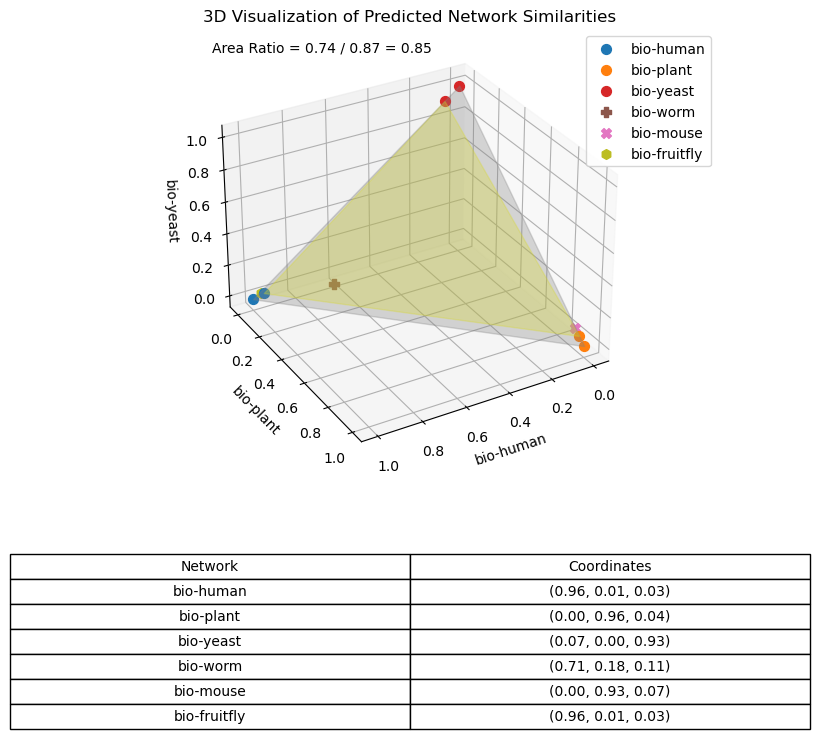

In [2]:
ntwk_list = ['bio-human', 'bio-plant', 'bio-yeast', 'bio-worm', 'bio-mouse', 'bio-fruitfly']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-yeast_bio-worm_bio-fruitfly_bs500_k60_xi5_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for bio-yeast
Calling `sndl_equalEdge` and computing dictionary for bio-worm
Calling `sndl_equalEdge` and computing dictionary for bio-fruitfly


100%|██████████| 250/250 [01:13<00:00,  3.39it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-yeast_bio-worm_bio-fruitfly_etc_bs500_k60_nc25_iter250_bi0_avg.png


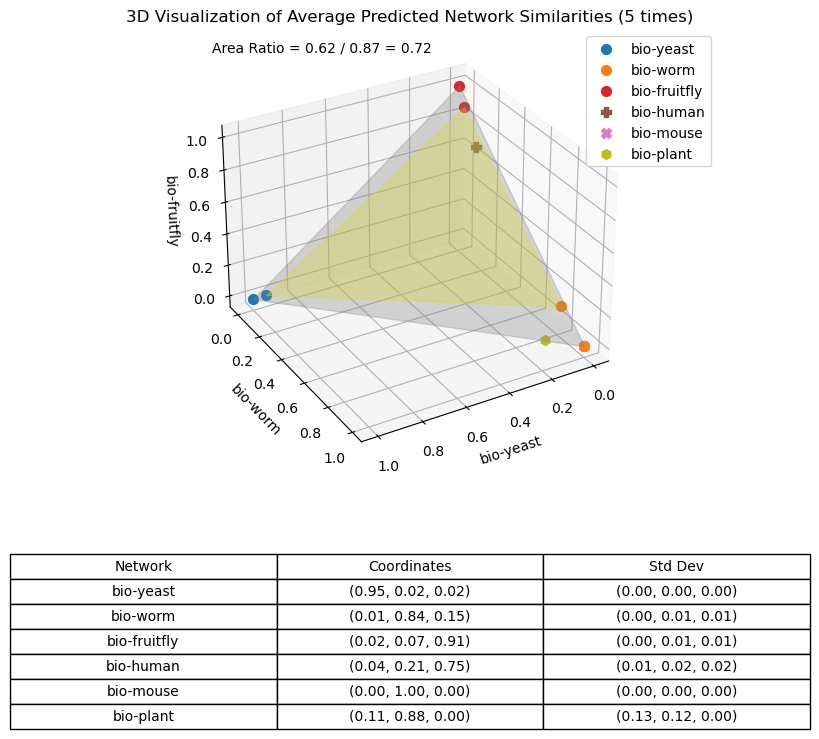

In [3]:
ntwk_list = ['bio-yeast', 'bio-worm', 'bio-fruitfly', 'bio-human', 'bio-mouse', 'bio-plant']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=5, baseline_i=0, skip_folded_hom=False,
                   average=True, times=5)

In [6]:
WS_single('bio-human')
BA_single('bio-human')
ER_single('bio-human')
CM_single('bio-human')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-human_BA_bio-human_CM_bio-human_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-human
Calling `sndl_equalEdge` and computing dictionary for BA_bio-human
Calling `sndl_equalEdge` and computing dictionary for CM_bio-human


100%|██████████| 250/250 [00:45<00:00,  5.48it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-human_BA_bio-human_CM_bio-human_etc_bs500_k60_nc25_iter250_bi0_single.png


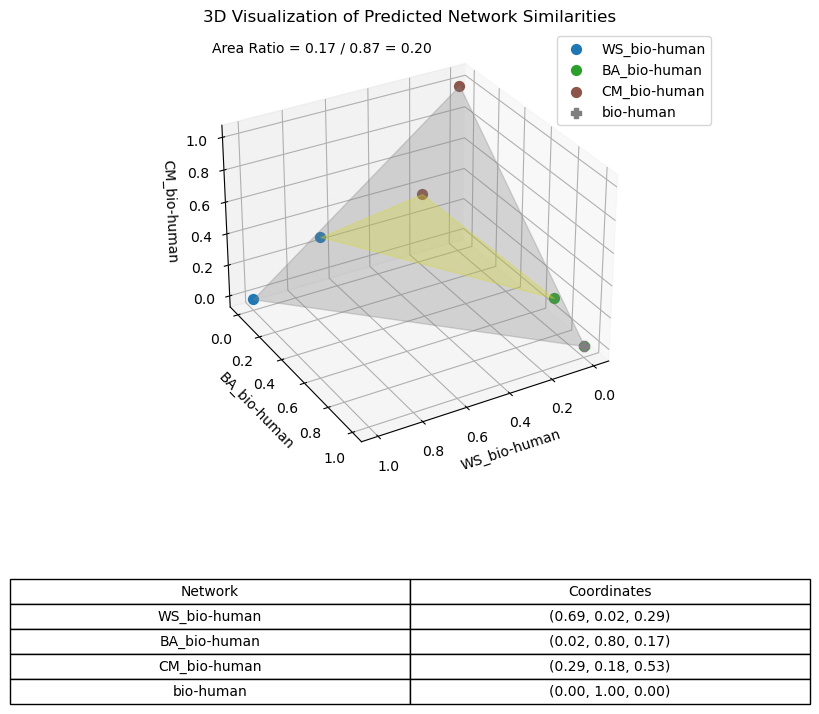

In [7]:
ntwk_list = ['WS_bio-human', 'BA_bio-human', 'CM_bio-human', 'bio-human']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

In [8]:
WS_single('bio-mouse')
BA_single('bio-mouse')
ER_single('bio-mouse')
CM_single('bio-mouse')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-mouse_BA_bio-mouse_CM_bio-mouse_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-mouse
Calling `sndl_equalEdge` and computing dictionary for BA_bio-mouse
Calling `sndl_equalEdge` and computing dictionary for CM_bio-mouse


100%|██████████| 250/250 [00:38<00:00,  6.47it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-mouse_BA_bio-mouse_CM_bio-mouse_etc_bs500_k60_nc25_iter250_bi0_single.png


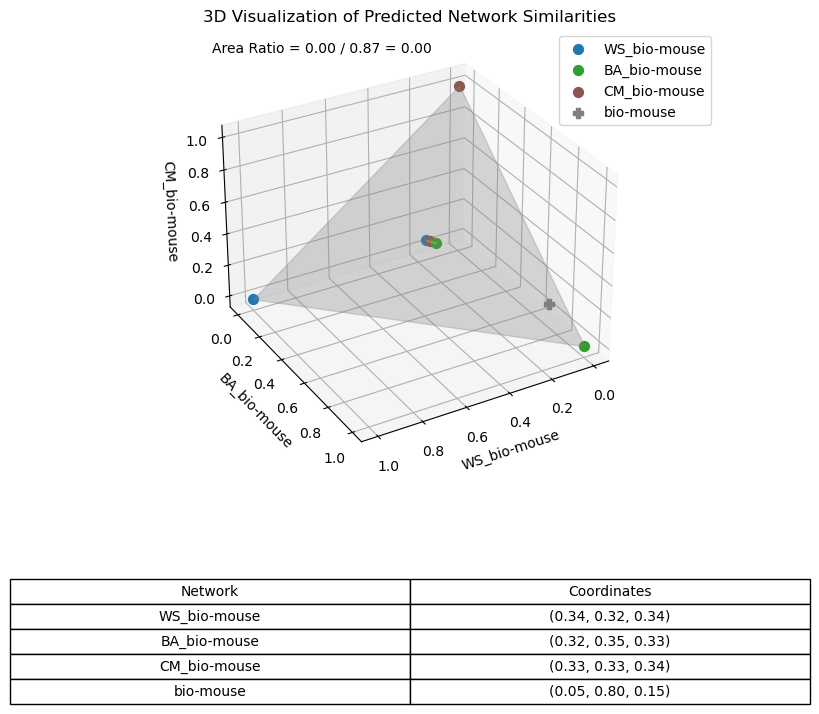

In [9]:
ntwk_list = ['WS_bio-mouse', 'BA_bio-mouse', 'CM_bio-mouse', 'bio-mouse']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

In [10]:
WS_single('bio-plant')
BA_single('bio-plant')
ER_single('bio-plant')
CM_single('bio-plant')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-plant_BA_bio-plant_CM_bio-plant_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-plant
Calling `sndl_equalEdge` and computing dictionary for BA_bio-plant
Calling `sndl_equalEdge` and computing dictionary for CM_bio-plant


100%|██████████| 250/250 [00:38<00:00,  6.56it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-plant_BA_bio-plant_CM_bio-plant_etc_bs500_k60_nc25_iter250_bi0_single.png


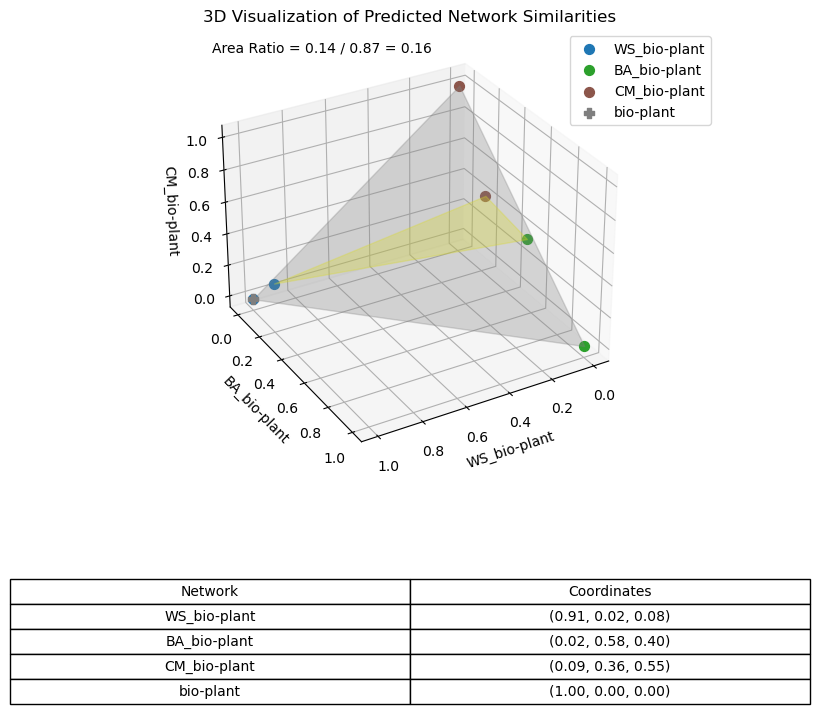

In [11]:
ntwk_list = ['WS_bio-plant', 'BA_bio-plant', 'CM_bio-plant', 'bio-plant']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

In [19]:
WS_single('bio-fruitfly')
BA_single('bio-fruitfly')
ER_single('bio-fruitfly')
CM_single('bio-fruitfly')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-fruitfly_BA_bio-fruitfly_CM_bio-fruitfly_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-fruitfly
Calling `sndl_equalEdge` and computing dictionary for BA_bio-fruitfly
Calling `sndl_equalEdge` and computing dictionary for CM_bio-fruitfly


100%|██████████| 250/250 [00:41<00:00,  5.99it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-fruitfly_BA_bio-fruitfly_CM_bio-fruitfly_etc_bs500_k60_nc25_iter250_bi0_single.png


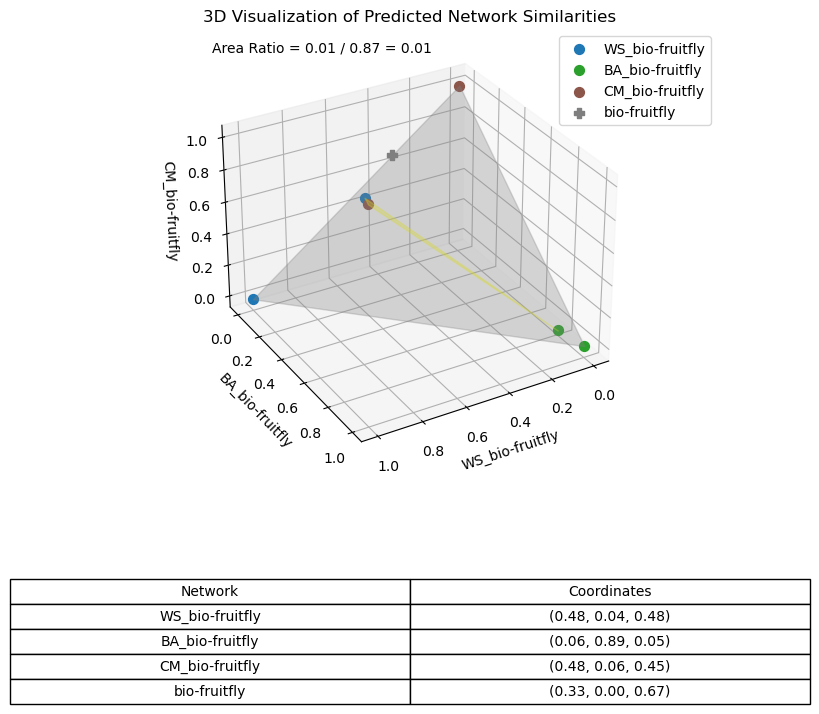

In [20]:
ntwk_list = ['WS_bio-fruitfly', 'BA_bio-fruitfly', 'CM_bio-fruitfly', 'bio-fruitfly']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

In [24]:
WS_single('bio-yeast')
BA_single('bio-yeast')
ER_single('bio-yeast')
CM_single('bio-yeast')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-yeast_BA_bio-yeast_CM_bio-yeast_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-yeast
Calling `sndl_equalEdge` and computing dictionary for BA_bio-yeast
Calling `sndl_equalEdge` and computing dictionary for CM_bio-yeast


100%|██████████| 250/250 [02:18<00:00,  1.81it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-yeast_BA_bio-yeast_CM_bio-yeast_etc_bs500_k60_nc25_iter250_bi0_single.png


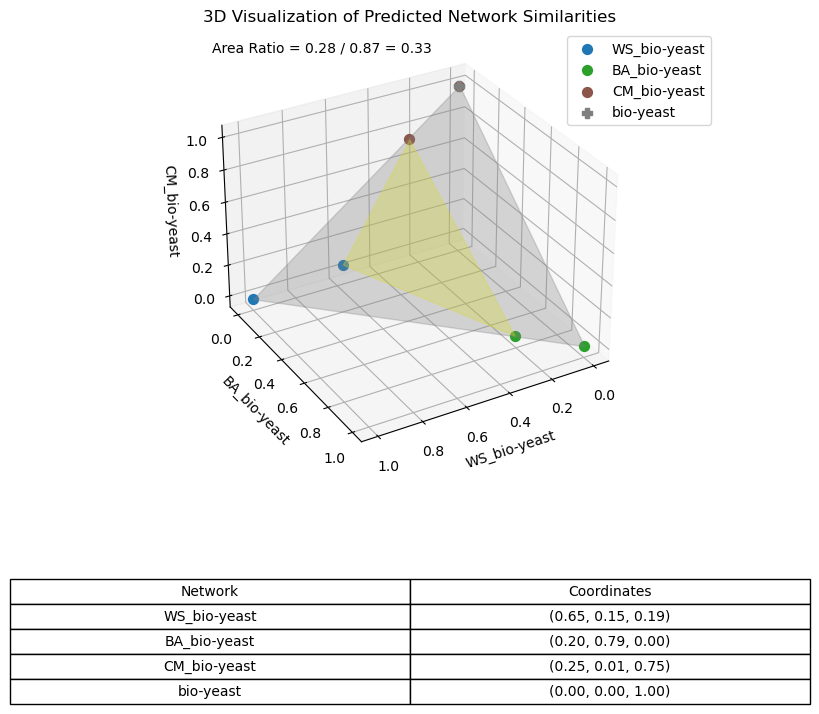

In [25]:
ntwk_list = ['WS_bio-yeast', 'BA_bio-yeast', 'CM_bio-yeast', 'bio-yeast']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

In [26]:
WS_single('bio-worm')
BA_single('bio-worm')
ER_single('bio-worm')
CM_single('bio-worm')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_bio-worm_BA_bio-worm_CM_bio-worm_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_bio-worm
Calling `sndl_equalEdge` and computing dictionary for BA_bio-worm
Calling `sndl_equalEdge` and computing dictionary for CM_bio-worm


100%|██████████| 250/250 [00:39<00:00,  6.30it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\WS_bio-worm_BA_bio-worm_CM_bio-worm_etc_bs500_k60_nc25_iter250_bi0_single.png


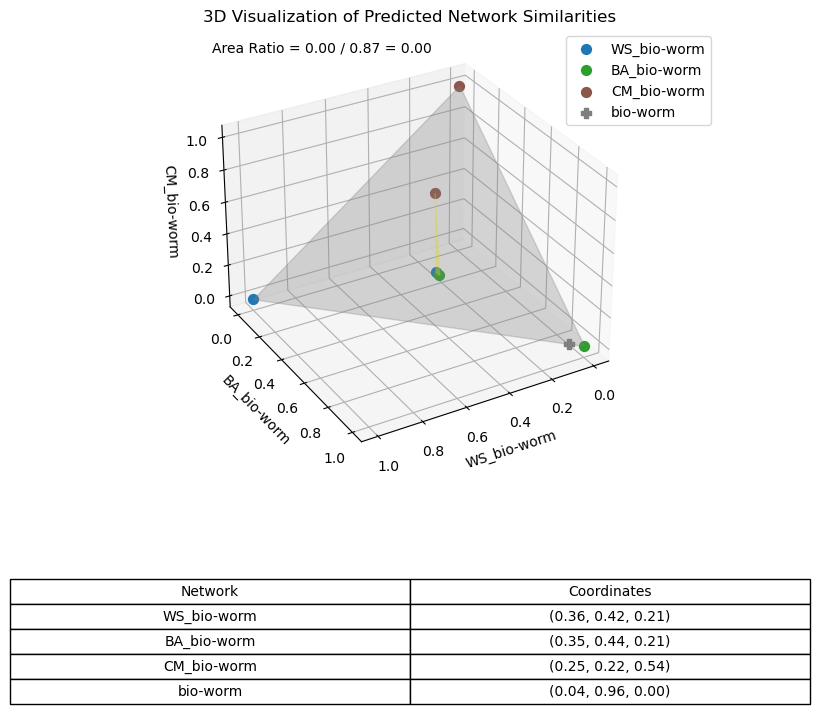

In [27]:
ntwk_list = ['WS_bio-worm', 'BA_bio-worm', 'CM_bio-worm', 'bio-worm']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

## Combined Networks

### Social Networks

In [15]:
BA_combined(['Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87'], save_path='data/BA_social_combined.txt')
WS_combined(['Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87'], save_path='data/WS_social_combined.txt')
CM_combined(['Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87'], save_path='data/CM_social_combined.txt')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/BA_social_combined_WS_social_combined_CM_social_combined_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for BA_social_combined
Calling `sndl_equalEdge` and computing dictionary for WS_social_combined
Calling `sndl_equalEdge` and computing dictionary for CM_social_combined


100%|██████████| 250/250 [00:42<00:00,  5.86it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\BA_social_combined_WS_social_combined_CM_social_combined_etc_bs500_k60_nc25_iter250_bi0_single.png


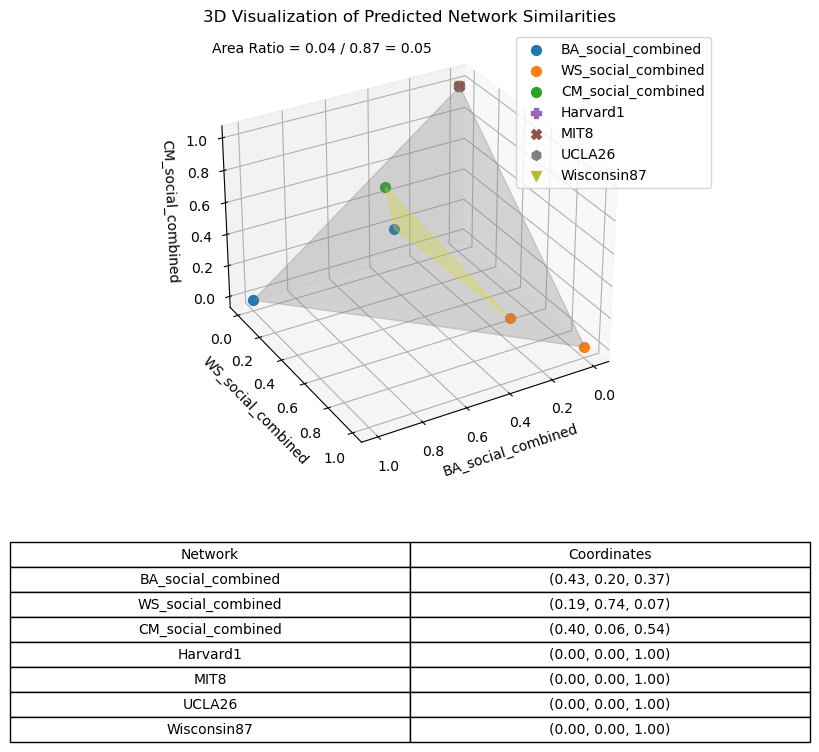

In [16]:
ntwk_list = ['BA_social_combined', 'WS_social_combined', 'CM_social_combined',
             'Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

### Biological Networks

In [17]:
bio_networks = ['bio-human', 'bio-mouse', 'bio-plant', 'bio-fruitfly', 'bio-yeast']

BA_combined(bio_networks, save_path='data/BA_bio_combined.txt')
WS_combined(bio_networks, save_path='data/WS_bio_combined.txt')
CM_combined(bio_networks, save_path='data/CM_bio_combined.txt')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/BA_bio_combined_WS_bio_combined_CM_bio_combined_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for BA_bio_combined
Calling `sndl_equalEdge` and computing dictionary for WS_bio_combined
Calling `sndl_equalEdge` and computing dictionary for CM_bio_combined


100%|██████████| 250/250 [00:49<00:00,  5.09it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\BA_bio_combined_WS_bio_combined_CM_bio_combined_etc_bs500_k60_nc25_iter250_bi0_single.png


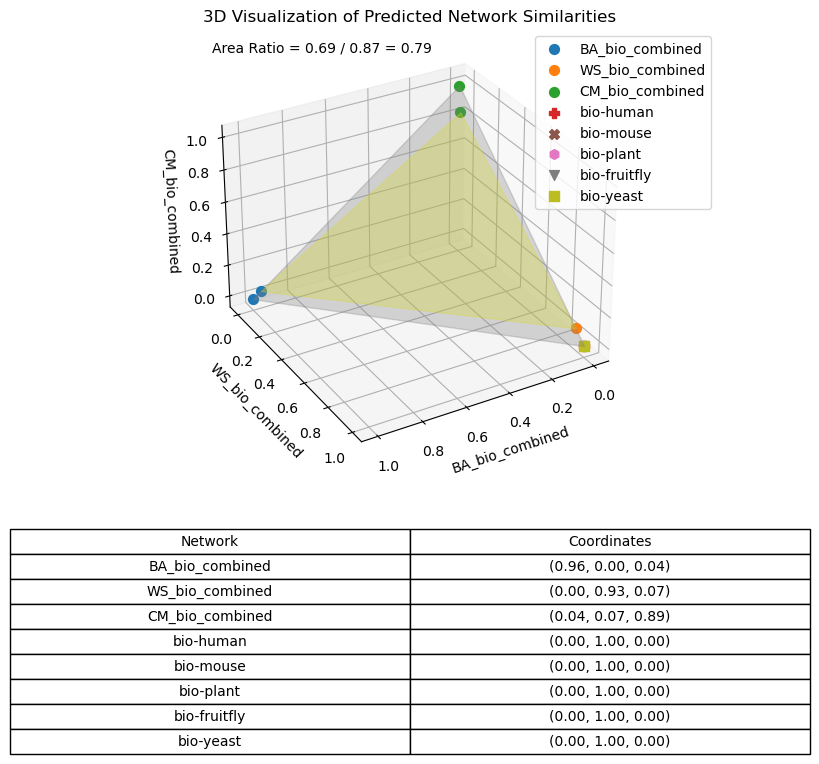

In [18]:
ntwk_list = ['BA_bio_combined', 'WS_bio_combined', 'CM_bio_combined',
             'bio-human', 'bio-mouse', 'bio-plant', 'bio-fruitfly', 'bio-yeast']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

### All Networks

In [21]:
all_networks = ['bio-human', 'bio-mouse', 'bio-plant', 'bio-fruitfly', 'bio-yeast',
                'Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87']
BA_combined(all_networks, save_path='data/BA_all_combined.txt')
WS_combined(all_networks, save_path='data/WS_all_combined.txt')
CM_combined(all_networks, save_path='data/CM_all_combined.txt')

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/BA_all_combined_WS_all_combined_CM_all_combined_bs500_k60_xi7_nc25_iter250_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for BA_all_combined
Calling `sndl_equalEdge` and computing dictionary for WS_all_combined
Calling `sndl_equalEdge` and computing dictionary for CM_all_combined


100%|██████████| 250/250 [00:55<00:00,  4.52it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\BA_all_combined_WS_all_combined_CM_all_combined_etc_bs500_k60_nc25_iter250_bi0_single.png


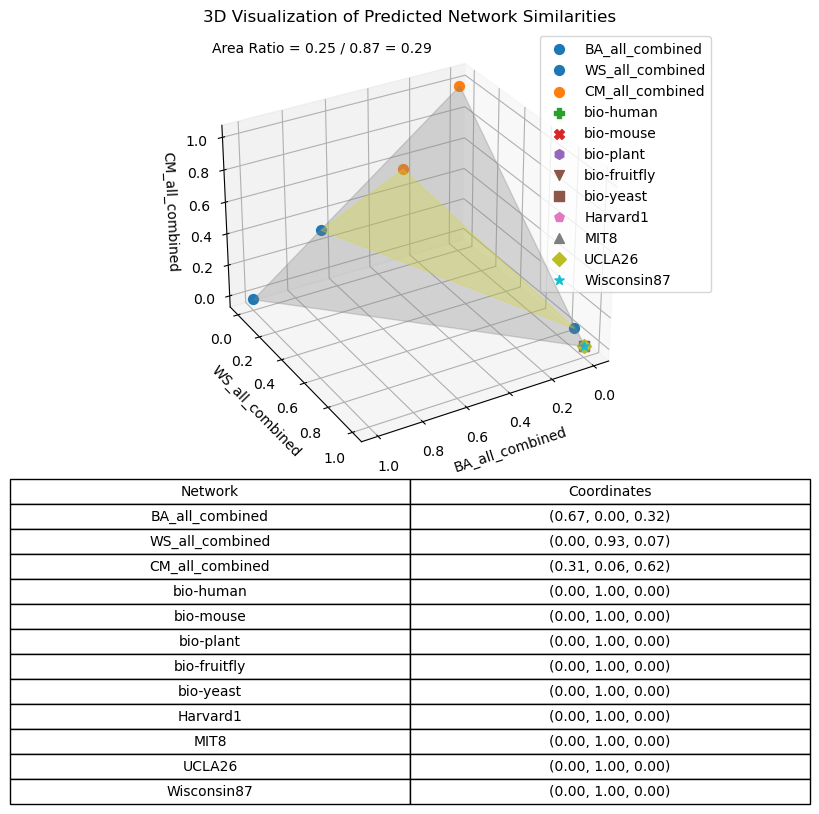

In [23]:
ntwk_list = ['BA_all_combined', 'WS_all_combined', 'CM_all_combined',
             'bio-human', 'bio-mouse', 'bio-plant', 'bio-fruitfly', 'bio-yeast',
             'Harvard1', 'MIT8', 'UCLA26', 'Wisconsin87']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)